=== ОБЫЧНЫЕ МНОГОУГОЛЬНИКИ ===


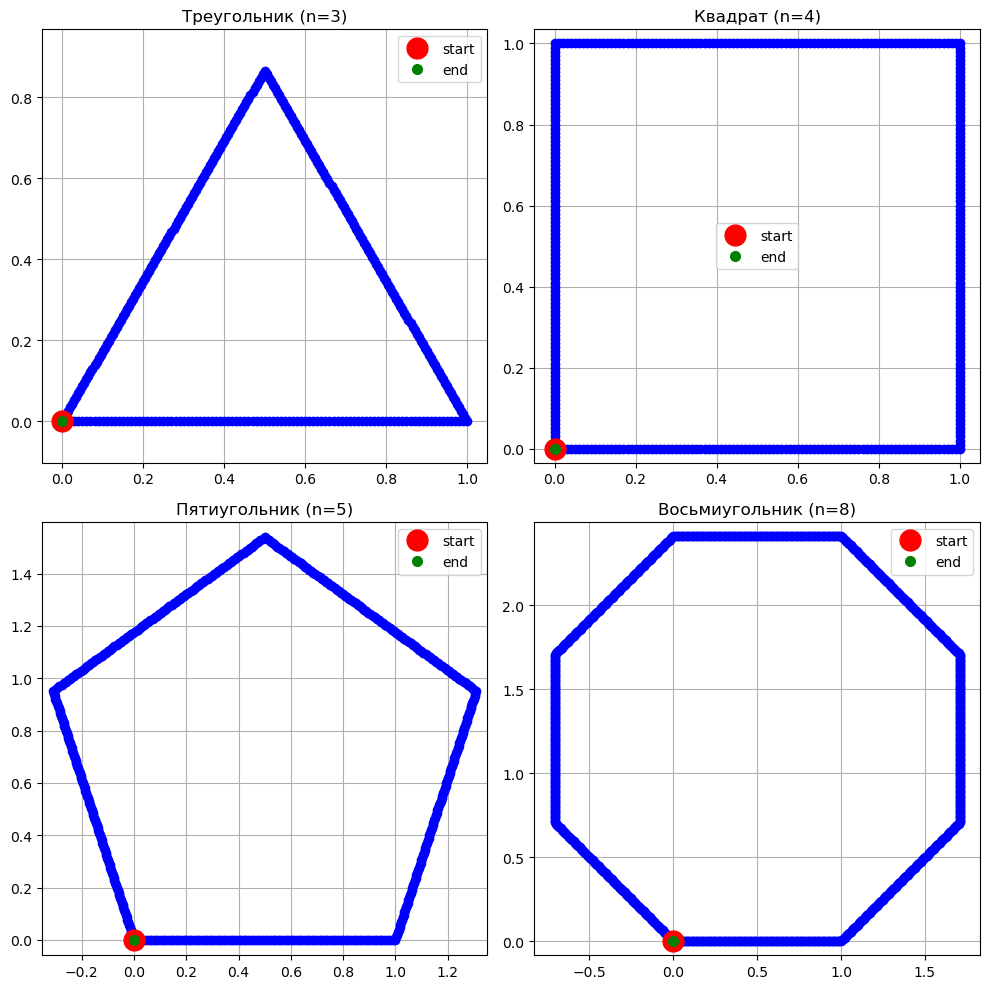

=== СКРУГЛЕННЫЕ МНОГОУГОЛЬНИКИ ===


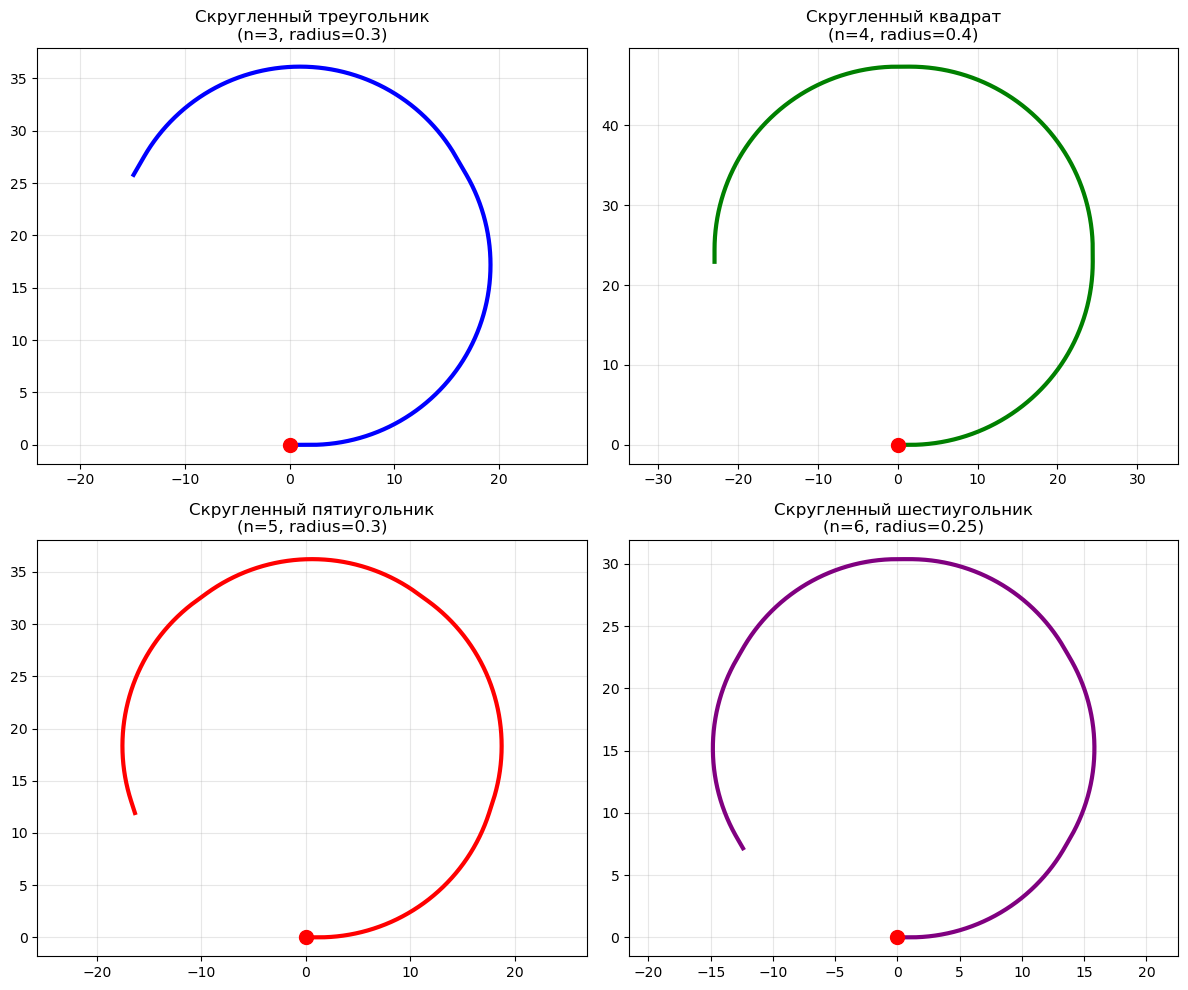

=== ПРОВЕРКА ТОЧНОСТИ ===
Начальная позиция: (0, 0)
Конечная позиция: (-22.923311441612242, 22.913311441602232)
Ошибка замыкания: 32.4114
Количество точек траектории: 11401
✗ Фигура не замкнута идеально


In [ ]:
import math
from platform import mac_ver
import matplotlib.pyplot as plt
class Robot:
    def __init__(self, name):
        self.name = name
        self.x = 0
        self.y = 0
        self.direction = 0
        self.speed = 0
        self.dt = 0.01
        self.angular_speed = 0
        self.history = [(0, 0)]
        


    def get_position(self):
        return self.x, self.y

    def get_direction(self):
        return self.direction

    def get_speed(self):
        return self.speed

    def set_speed(self, new_speed):
        self.speed = max(0, min(new_speed, 100))
        

    def turn(self, angle):
        self.direction += angle

    def draw_square(self, side_length):
        for i in range(5):
            self.move_forward(side_length)
            self.turn(90)


    def set_direction(self, new_direction):
        self.direction = new_direction

    def update(self):
        self.distance = self.speed * self.dt
        self.angular = self.angular_speed * self.dt
        self.turn(self.angular)
        self.move_forward(self.distance)

    def simulate(self, duration):
        self.number = int(duration/self.dt)
        for i in range(self.number):
            self.update()

    def move_forward(self, distance):
        self.x += distance * math.cos(math.radians(self.direction))
        self.y += distance * math.sin(math.radians(self.direction))
        self.history.append((self.x, self.y))

    def set_speed(self, new_speed):
        self.speed = new_speed 

    def draw_path(self):
        if len(self.history) < 2:
            return "Не хватает данных"
        else:
            self.x_coords = [pos[0] for pos in self.history]
            self.y_coords = [pos[1] for pos in self.history]
            plt.figure(figsize=(4, 4))
            plt.plot(self.x_coords, self.y_coords, 'b-o')
            plt.plot(self.x_coords[0], self.y_coords[0], 'ro', label='start',  markersize=15)
            plt.plot(self.x_coords[-1], self.y_coords[-1], 'go', label='end',  markersize=7)
            plt.axis('equal')
            plt.grid(True)
            plt.legend()
            plt.show()

    def get_angular_speed(self):
        return self.angular_speed

    def set_angular_speed(self, new_angular_speed):
        self.angular_speed = max(-180, min(180, new_angular_speed))

    def move_in_circle(self, radius, period):
        self.distance = 2*radius*math.pi
        self.speed = self.distance / period
        self.set_speed(self.speed)
        self.angular_speed = 360/period
        self.set_angular_speed(self.angular_speed)
        self.simulate(period)

    def n_angular(self, n_sides, sd, ms, tas):
        self.direction = 360 / n_sides
        self.t_move = sd/ms
        self.t_turn = self.direction / tas
        for _ in range(n_sides):
        # Движение
            self.set_speed(ms)
            self.set_angular_speed(0)
            self.simulate(self.t_move)
        
        # Поворот
            self.set_speed(0)
            self.set_angular_speed(tas)
            self.simulate(self.t_turn)

        self.set_speed(0)
        self.set_angular_speed(0)

    def draw_polygon(self, n, side_length):
        self.angle = 360 / n
        for i in range(n):
            self.move_forward(side_length)
            self.turn(self.angle)

    def draw_rounded_polygon(self, n, side_length, radius):
        for i in range(n):
            self.set_angular_speed(0)
            self.move_forward(side_length)
            if radius <= 0:
                print('радиус отрицателен')
            else: 
                self.omega = self.speed / radius
                self.set_angular_speed(self.omega)
                self.time_for_turn = (360 / n) / self.omega
                self.update()


    def info(self):
        return f"Робот - {self.name}, находится в координатах - {self.x, self.y}, направление на {self.direction} градусов, скорость - {self.speed}"

# Создаем сетку графиков 2x2 для демонстрации метода draw_polygon
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
robot1 = Robot("triangle")
robot1.draw_polygon(3, 1)
x1, y1 = zip(*robot1.history)
plt.plot(x1, y1, 'b-o')
plt.plot(x1[0], y1[0], 'ro', label='start', markersize=15)
plt.plot(x1[-1], y1[-1], 'go', label='end', markersize=7)
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title("Треугольник (n=3)")

plt.subplot(2, 2, 2)
robot2 = Robot("square")
robot2.draw_polygon(4, 1)
x2, y2 = zip(*robot2.history)
plt.plot(x2, y2, 'b-o')
plt.plot(x2[0], y2[0], 'ro', label='start', markersize=15)
plt.plot(x2[-1], y2[-1], 'go', label='end', markersize=7)
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title("Квадрат (n=4)")

plt.subplot(2, 2, 3)
robot3 = Robot("pentagon")
robot3.draw_polygon(5, 1)
x3, y3 = zip(*robot3.history)
plt.plot(x3, y3, 'b-o')
plt.plot(x3[0], y3[0], 'ro', label='start', markersize=15)
plt.plot(x3[-1], y3[-1], 'go', label='end', markersize=7)
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title("Пятиугольник (n=5)")

plt.subplot(2, 2, 4)
robot4 = Robot("octagon")
robot4.draw_polygon(8, 1)
x4, y4 = zip(*robot4.history)
plt.plot(x4, y4, 'b-o')
plt.plot(x4[0], y4[0], 'ro', label='start', markersize=15)
plt.plot(x4[-1], y4[-1], 'go', label='end', markersize=7)
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title("Восьмиугольник (n=8)")

#jjjjj

plt.figure(figsize=(12, 10))

